In [1]:
# This notebook makes demonstrative pulse plots for the Muon lab

# Imports
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def gaussian(x, s, m, a):
    return a * np.e ** (-(x - m) ** 2 / 2 / s ** 2)

def dgaussian(x, s, m, a):
    return gaussian(x, s, m, a) * (-(x - m) / s)

def discriminator(x, cl, cu):
    if x > cl and x < cu:
        return 5
    else:
        return 0
    
def find_cl(x, s, m, a, t):
    for point in x:
        if dgaussian(point, s, m, a) > t:
            return point

In [50]:
x = [i * 0.01 for i in range(int(12e3 * 7))]

s = 30
m = 95
a = -4
t = 1
cl = find_cl(x, s, m, a, t)
cu = cl + 600

ys = [
    [gaussian(i, s, m, a) for i in x],
    [dgaussian(i, s, m, a) for i in x],
    [discriminator(i, cl, cu) for i in x]
]

save = True
axes = ['time (ns)', 'amplitude (volts)']
labels = ['Negative Pulse', 'Derivative of the Negative Pulse', 'Post-Discriminator Pulse']
title = 'Comparison of Pulses Throughout the Apparatus'
colours = ['tab:orange', 'tab:red', 'tab:purple']


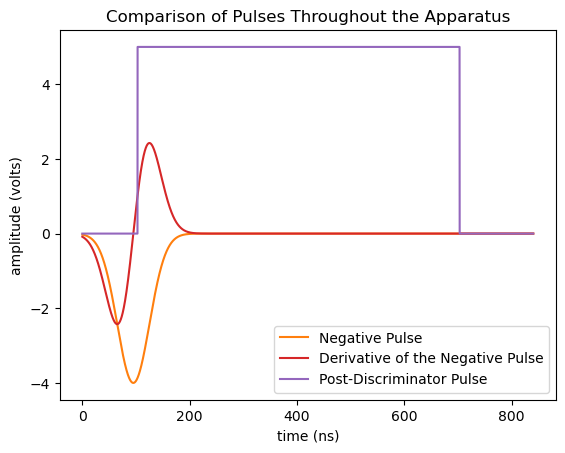

In [51]:
# Plots
for i in range(len(ys)):
    plt.plot(x, ys[i], color = colours[i], label = labels[i])

plt.xlabel(axes[0])
plt.ylabel(axes[1])

# Adds a title
plt.title(title)

plt.legend()
plt.savefig('Pulses.png') if save else plt.show()